<a href="https://colab.research.google.com/github/SwapnasumaM/Final_Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


**DATA CLEANING**

In [ ]:
df=pd.read_csv("/content/Customer Conversion Prediction - Customer Conversion Prediction.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df=df.drop('call_type',axis=1)

In [ ]:
df.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,5,may,261,1,unknown,no
1,44,technician,single,secondary,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,5,may,198,1,unknown,no


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
df['dur'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [ ]:
df['num_calls'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(45202, 10)

**DATA VISUALIZATION**

In [ ]:
df.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,5,may,261,1,unknown,no
1,44,technician,single,secondary,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,5,may,198,1,unknown,no


#plotting categorical data

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prediction no.of consumers according to job')

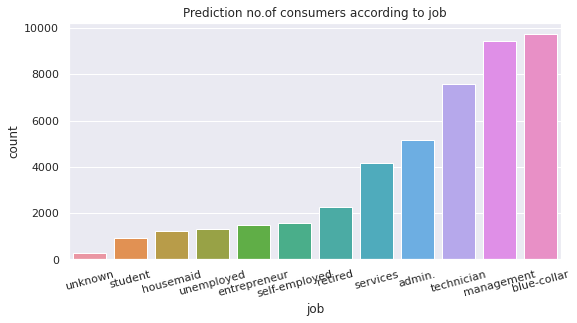

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')
plt.figure(figsize=(30,20))
plt.subplot(431)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel("job")
plt.ylabel("count")
plt.title("Prediction no.of consumers according to job")




/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prediction no.of consumers according to marital status')

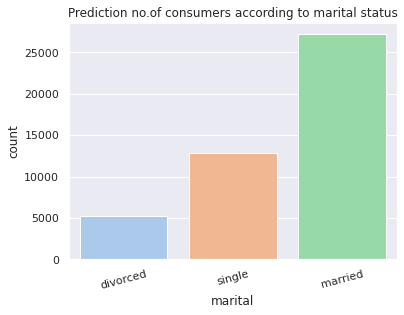

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(431)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel("marital")
plt.ylabel("count")
plt.title("Prediction no.of consumers according to marital status")


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prediction no.of consumers according to education qualification')

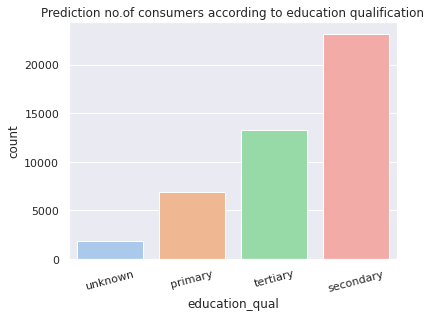

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(431)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel("education_qual")
plt.ylabel("count")
plt.title("Prediction no.of consumers according to education qualification")

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prediction no.of consumers according to month')

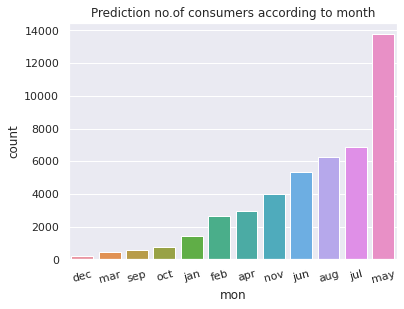

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(431)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel("mon")
plt.ylabel("count")
plt.title("Prediction no.of consumers according to month")

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prediction no.of consumers according to Previous Outcome')

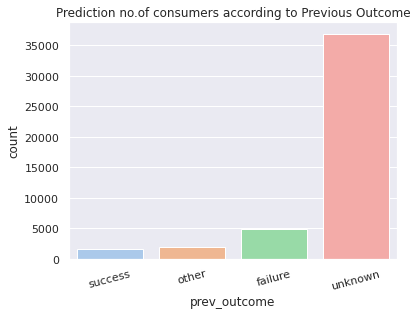

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(431)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel("prev_outcome")
plt.ylabel("count")
plt.title("Prediction no.of consumers according to Previous Outcome")

plotting feature vs target

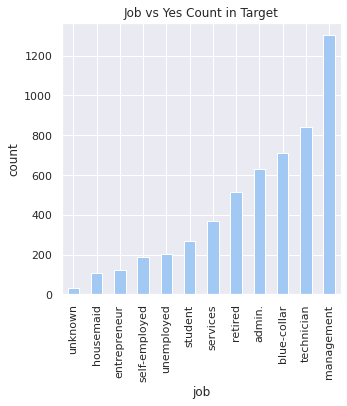

In [ ]:
grouped_df = df.groupby('job')['y'].value_counts().unstack(fill_value=0)
grouped_df = grouped_df.sort_values(by='yes', ascending=True) # sort by Yes count in descending order
yes_values = grouped_df['yes'] # get the Yes column
yes_values.plot(kind='bar', figsize=(5,5)) # plot only the Yes values
plt.xlabel("job")
plt.ylabel("count")
plt.title("Job vs Yes Count in Target")
plt.show()


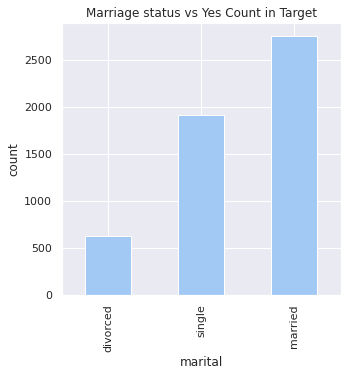

In [ ]:
grouped_df = df.groupby('marital')['y'].value_counts().unstack(fill_value=0)
grouped_df = grouped_df.sort_values(by='yes', ascending=True) # sort by Yes count in descending order
yes_values = grouped_df['yes'] # get the Yes column
yes_values.plot(kind='bar', figsize=(5,5)) # plot only the Yes values
plt.xlabel("marital")
plt.ylabel("count")
plt.title("Marriage status vs Yes Count in Target")
plt.show()


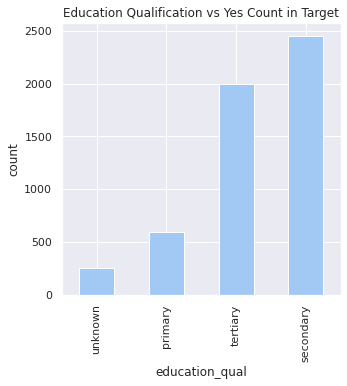

In [ ]:
grouped_df = df.groupby('education_qual')['y'].value_counts().unstack(fill_value=0)
grouped_df = grouped_df.sort_values(by='yes', ascending=True) # sort by Yes count in descending order
yes_values = grouped_df['yes'] # get the Yes column
yes_values.plot(kind='bar', figsize=(5,5)) # plot only the Yes values
plt.xlabel("education_qual")
plt.ylabel("count")
plt.title("Education Qualification vs Yes Count in Target")
plt.show()


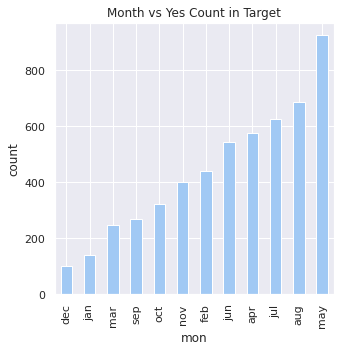

In [ ]:
grouped_df = df.groupby('mon')['y'].value_counts().unstack(fill_value=0)
grouped_df = grouped_df.sort_values(by='yes', ascending=True) # sort by Yes count in descending order
yes_values = grouped_df['yes'] # get the Yes column
yes_values.plot(kind='bar', figsize=(5,5)) # plot only the Yes values
plt.xlabel("mon")
plt.ylabel("count")
plt.title("Month vs Yes Count in Target")
plt.show()


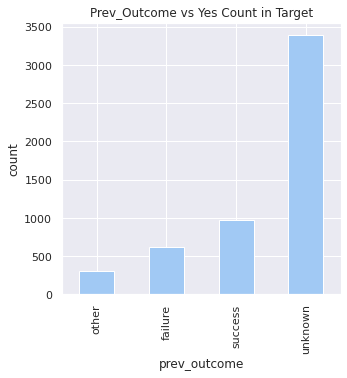

In [ ]:
grouped_df = df.groupby('prev_outcome')['y'].value_counts().unstack(fill_value=0)
grouped_df = grouped_df.sort_values(by='yes', ascending=True) # sort by Yes count in descending order
yes_values = grouped_df['yes'] # get the Yes column
yes_values.plot(kind='bar', figsize=(5,5)) # plot only the Yes values
plt.xlabel("prev_outcome")
plt.ylabel("count")
plt.title("Prev_Outcome vs Yes Count in Target")
plt.show()


EDA for Numerical data vs Yes count in the target 

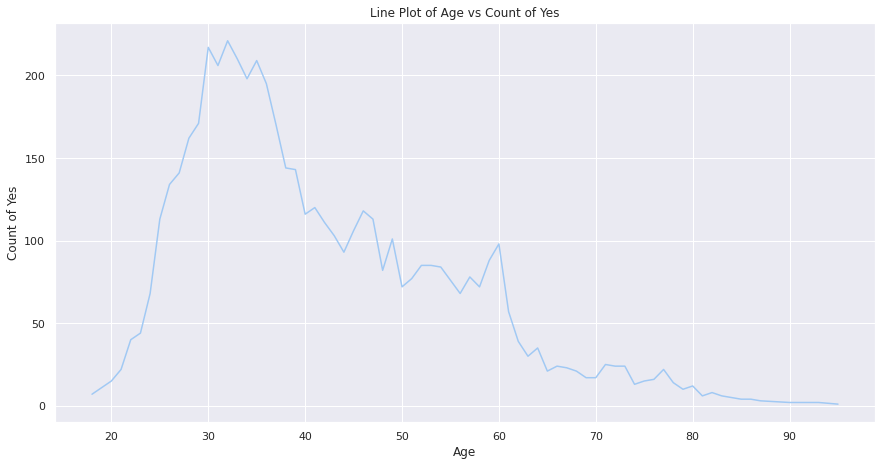

In [ ]:
plt.figure(figsize=(50,25))
plt.subplot(331)

# Filter data to get only rows where y value is 'yes'
yes_data = df[df['y'] == 'yes']

# Group the filtered data by 'age' and count the number of rows
age_count = yes_data.groupby('age')['y'].count().reset_index()

# Plot the line graph
sns.lineplot(data=age_count, x='age', y='y')

# Set the x and y-axis labels and title
plt.xlabel('Age')
plt.ylabel('Count of Yes')
plt.title('Line Plot of Age vs Count of Yes')
plt.show()


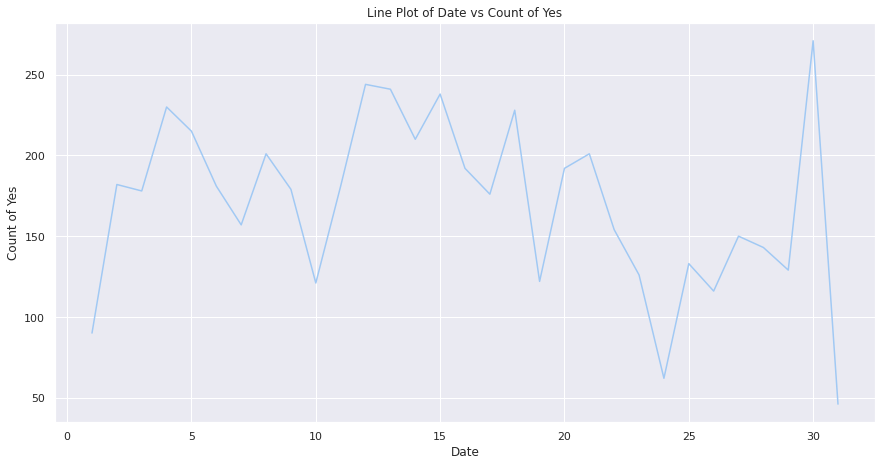

In [ ]:
plt.figure(figsize=(50,25))
plt.subplot(331)


yes_data = df[df['y'] == 'yes']


age_count = yes_data.groupby('day')['y'].count().reset_index()


sns.lineplot(data=age_count, x='day', y='y')


plt.xlabel('Date')
plt.ylabel('Count of Yes')
plt.title('Line Plot of Date vs Count of Yes')
plt.show()


In [ ]:
plt.figure(figsize=(50,25))
plt.subplot(331)

# Filter data to get only rows where y value is 'yes'
yes_data = df[df['y'] == 'yes']

# Group the filtered data by 'age' and count the number of rows
age_count = yes_data.groupby('dur')['y'].count().reset_index()

# Plot the line graph
sns.lineplot(data=age_count, x='dur', y='y')

# Set the x and y-axis labels and title
plt.xlabel('Duration')
plt.ylabel('Count of Yes')
plt.title('Line Plot of Duration vs Count of Yes')
plt.show()


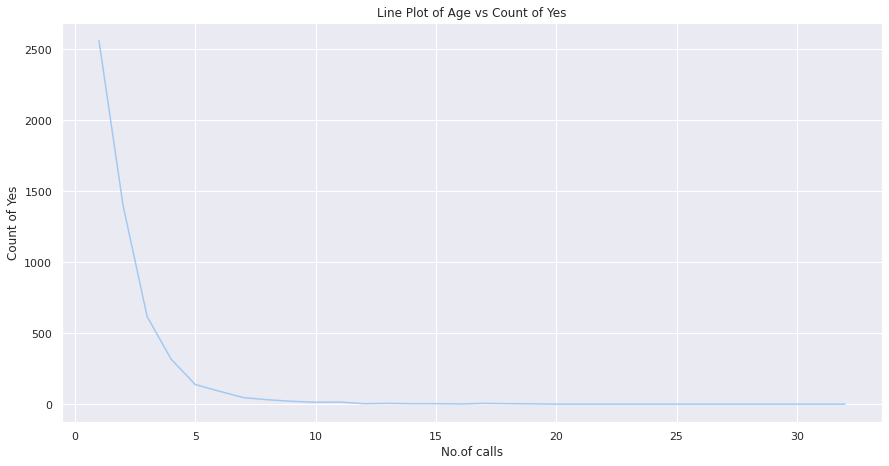

In [ ]:
plt.figure(figsize=(50,25))
plt.subplot(331)

# Filter data to get only rows where y value is 'yes'
yes_data = df[df['y'] == 'yes']

# Group the filtered data by 'age' and count the number of rows
age_count = yes_data.groupby('num_calls')['y'].count().reset_index()

# Plot the line graph
sns.lineplot(data=age_count, x='num_calls', y='y')

# Set the x and y-axis labels and title
plt.xlabel('No.of calls')
plt.ylabel('Count of Yes')
plt.title('Line Plot of Age vs Count of Yes')
plt.show()


Encoding categorical variables

In [ ]:
df['marital']=df['marital'].map({'divorced':0,'single':1,'married':3})
df['education_qual']=df['education_qual'].map({'unknown':0,'primary':1,'tertiary':4,'secondary':5})
df['prev_outcome']=df['prev_outcome'].map({'other':0,'failure':1,'success':2,'unknown':6})
df['y']=df['y'].map({'yes':0,'no':1})
df['mon']=df['mon'].map({'dec':0,'jan':1,'mar':3,'sep':4,'oct':5,'nov':7,'feb':8,'jun':10,'apr':11,'jul':12,'aug':13,'may':16})
one_hot=pd.get_dummies(df['job'])
df = pd.concat([df, one_hot], axis=1)
df = df.drop('job', axis=1)

df.head()




,age,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y,admin.,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,3,4,5,16,261,1,6,1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,1,5,5,16,151,1,6,1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,3,5,5,16,76,1,6,1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,3,0,5,16,92,1,6,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,1,0,5,16,198,1,6,1,0,...,0,0,0,0,0,0,0,0,0,1


splitting the data into input data and output data

In [ ]:
def split(dataframe):
    X=dataframe.drop('y',axis=1)
    z=dataframe['y']
    return X,z

X,z=split(df)
X

,age,marital,education_qual,day,mon,dur,num_calls,prev_outcome,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,58,3,4,5,16,261,1,6,0,0,0,0,1,0,0,0,0,0,0,0
1,44,1,5,5,16,151,1,6,0,0,0,0,0,0,0,0,0,1,0,0
2,33,3,5,5,16,76,1,6,0,0,1,0,0,0,0,0,0,0,0,0
3,47,3,0,5,16,92,1,6,0,1,0,0,0,0,0,0,0,0,0,0
4,33,1,0,5,16,198,1,6,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,4,17,7,977,3,6,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1,17,7,456,2,6,0,0,0,0,0,1,0,0,0,0,0,0
45208,72,3,5,17,7,1127,5,2,0,0,0,0,0,1,0,0,0,0,0,0
45209,57,3,5,17,7,508,4,6,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
z

0        1
1        1
2        1
3        1
4        1
        ..
45206    0
45207    0
45208    0
45209    1
45210    1
Name: y, Length: 45202, dtype: int64

In [ ]:
X_train,X_test,z_train,z_test=train_test_split(X,z,test_size=0.2,random_state=42)
print(X_train.shape,z_train.shape,X_test.shape,z_test.shape)


(36161, 20) (36161,) (9041, 20) (9041,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,z_train)
prediction=logistic.predict(X_test)
print(prediction)

[1 1 1 ... 1 1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logistic.intercept_

array([0.14069504])

In [ ]:
logistic.coef_

array([[ 4.41165951e-03,  1.40013269e-01,  3.75603120e-02,
         1.77737421e-02,  1.12777772e-01, -3.66617672e-03,
         5.61784650e-02,  1.59348006e-01, -3.48627197e-02,
         4.11282567e-01,  6.98690564e-02,  5.67459804e-02,
        -1.62450949e-01, -2.21615730e-01,  2.34386190e-02,
         1.24698439e-01, -1.57754141e-01,  2.40053973e-02,
         7.11345804e-03,  1.59417029e-04]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(z_test,prediction)
print(confusion_matrix)

[[ 203  897]
 [ 125 7816]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(z_test,prediction)
print(accuracy_score)

0.8869594071452273


KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier=KNeighborsClassifier(n_neighbors=5)
KNN_classifier.fit(X_train,z_train)
prediction=KNN_classifier.predict(X_test)
print(prediction)

[1 1 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(z_test,prediction)
print(confusion_matrix)

[[ 318  782]
 [ 270 7671]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(z_test,prediction)
print(accuracy_score)

0.8836411901338348


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# create a decision tree classifier object
dt_classifier = DecisionTreeClassifier()

# fit the classifier to the training data
dt_classifier.fit(X_train, z_train)

# make predictions on the test data
prediction = dt_classifier.predict(X_test)

print(prediction)


[1 1 0 ... 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(z_test,prediction)
print(confusion_matrix)

[[ 528  572]
 [ 605 7336]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(z_test,prediction)
print(accuracy_score)

0.8698152859196991


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, z_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

# Print the predicted values
print(y_pred)


[1 1 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(z_test,y_pred)
print(confusion_matrix)

[[ 442  658]
 [ 244 7697]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(z_test,y_pred)
print(accuracy_score)

0.9002322751907975


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, z_train)
y_pred = gnb.predict(X_test)
print(y_pred)


[1 1 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(z_test,y_pred)
print(confusion_matrix)

[[ 466  634]
 [ 882 7059]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(z_test,y_pred)
print(accuracy_score)

0.8323194336909634


In [ ]:
from sklearn.metrics import roc_auc_score
logistic_auc = roc_auc_score(z_test, logistic.predict_proba(X_test)[:,1])
print('AUROC for logistic regression:', logistic_auc)


AUROC for logistic regression: 0.8586806104108711


In [ ]:
dt_prediction = dt_classifier .predict_proba(X_test)[:, 1]
dt_auc = roc_auc_score(z_test, dt_prediction)
print('AUROC for decision tree:', dt_auc)

AUROC for decision tree: 0.7019065608865382


In [ ]:
rf_auc = roc_auc_score(z_test, rf.predict_proba(X_test)[:, 1])
print('AUROC for Random Forest:', rf_auc)

AUROC for Random Forest: 0.9136697347483143


In [ ]:
nb_auc = roc_auc_score(z_test,gnb.predict_proba(X_test)[:, 1] )
print('AUROC for Naive Bayes:', nb_auc)

AUROC for Naive Bayes: 0.78038660118373


In [ ]:
Knn_auc = roc_auc_score(z_test,KNN_classifier.predict_proba(X_test)[:, 1] )
print('AUROC for Naive Bayes:', Knn_auc)

AUROC for Naive Bayes: 0.7924579569781687


In this problem statement,we have applied logistic,KNN,Decision Tree,Random Forest and Naive Bayes Algorithms.According AUROC metric RANDOM FOREST ALGORITHM is the best fit for the model with AUROC for Random Forest: 0.9136697347483143

